## 模型评价
(1) Precision/Recall  
(2) Accuracy  
(3) F1 score  
(4) ROC曲线（Receiver Operating Characteristic, 受试者工作特性曲线）  
(5) ROC曲线之下的面积，即AUC（Area under curve）

#### 引入必要的包 -> 调用数据集 -> 使数据集中不同类别数量偏斜 -> 分离训练、测试数据集 -> 实例化一个逻辑回归模型 -> 预测并求出模型准确率

In [6]:
# 引入必要的包
import numpy as np
import time
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 使用库内自带的手写数字集
digits = load_digits()
X = digits.data
y = digits.target.copy()

# 故意致使数据集类别的不平衡
y[digits.target == 5] = 1
y[digits.target != 5] = 0

# 分离训练和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 233)
# 实例化一个逻辑回归并训练
t0 = time.time()
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
t1 = time.time()
print('Training cost:\t%f seconds'%(t1 - t0))

accuracy = logistic_clf.score(X_test, y_test)
y_predict = logistic_clf.predict(X_test)
t2 = time.time()
print('Predict cost:\t%f seconds'%(t2 - t1))
print('Accuracy: \t%.4f'% accuracy)

Training cost:	0.012992 seconds
Predict cost:	0.000999 seconds
Accuracy: 	0.9844


#### 计算上述评价标准

#### （1）手动版本

In [7]:
# def TN(y_true, y_predict):
#     assert len(y_true) == len(y_predict),\
#     'the vectors y_true and y_predict must have the same length!'
#     return sum((y_true == 0) & (y_predict == 0))

# def TP(y_true, y_predict):
#     assert len(y_true) == len(y_predict),\
#     'the vectors y_true and y_predict must have the same length!'
#     return sum((y_true == 1) & (y_predict == 1))

# def FN(y_true, y_predict):
#     assert len(y_true) == len(y_predict),\
#     'the vectors y_true and y_predict must have the same length!'
#     return sum((y_true == 1) & (y_predict == 0))

# def FP(y_true, y_predict):
#     assert len(y_true) == len(y_predict),\
#     'the vectors y_true and y_predict must have the same length!'
#     return sum((y_true == 0) & (y_predict == 1))

# # 计算混淆矩阵
# def confusion_matrix(y_true, y_predict):
#     assert len(y_true) == len(y_predict),\
#     'the vectors y_true and y_predict must have the same length!'
#     return np.array([
#         [TN(y_true, y_predict), FP(y_true, y_predict)],
#         [FN(y_true, y_predict), TP(y_true, y_predict)]
#     ])

# # 计算查准率Precision
# def precision_score(y_true, y_predict):
#     assert len(y_true) == len(y_predict),\
#     'the vectors y_true and y_predict must have the same length!'
#     TP = TP(y_true, y_predict)
#     FP = FP(y_true, y_predict)
#     try:
#         return TP / (FP + TP)
#     except:
#         return 0

# # 计算召回率Recall
# def recall_score(y_true, y_predict):
#     assert len(y_true) == len(y_predict),\
#     'the vectors y_true and y_predict must have the same length!'
#     TP = TP(y_true, y_predict)
#     FN = FN(y_true, y_predict)
#     try:
#         return TP / (FN + TP)
#     except:
#         return 0

# # 计算F1 score
# def f1_score(y_true, y_predict):
#     p = precision_score(y_true, y_predict)
#     r = recall(y_true, y_predict)
#     return 2*p*r / (p + r)

#### （2）scikit-learn版本

In [11]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import f1_score, recall_score

confusion_mat = confusion_matrix(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
F1_score = f1_score(y_test, y_predict)

print('混淆矩阵: \n', confusion_mat)
print('Precision: ', precision)
print('Recall: ', recall)

混淆矩阵: 
 [[398   2]
 [  5  45]]
Precision:  0.9574468085106383
Recall:  0.9


#### 绘制查准率与召回率和阈值取值的关系

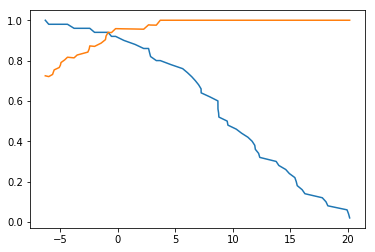

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

decision_scores = logistic_clf.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

plt.plot(thresholds, recalls[:-1])
plt.plot(thresholds, precisions[:-1])
plt.show()

#### 绘制PR曲线

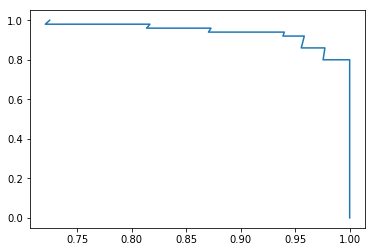

In [15]:
plt.plot(precisions, recalls)
plt.show()

#### 绘制ROC曲线

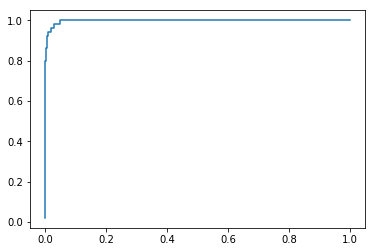

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)
plt.plot(fprs, tprs)
plt.show()

#### 计算AUC值

In [17]:
auc = roc_auc_score(y_test, decision_scores)
print('AUC: ', auc)

AUC:  0.99755
